# A Quick Look into Suicide Rates

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('master.csv')

In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [11]:
df[df['suicides_no'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 9 to 27543
Data columns (total 12 columns):
country               4281 non-null object
year                  4281 non-null int64
sex                   4281 non-null object
age                   4281 non-null object
suicides_no           4281 non-null int64
population            4281 non-null int64
suicides/100k pop     4281 non-null float64
country-year          4281 non-null object
HDI for year          1157 non-null float64
 gdp_for_year ($)     4281 non-null object
gdp_per_capita ($)    4281 non-null int64
generation            4281 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 434.8+ KB


In [12]:
# cleaning up column names
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year', 'gdp_per_capita', 'generation']

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

c:\users\iechi\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



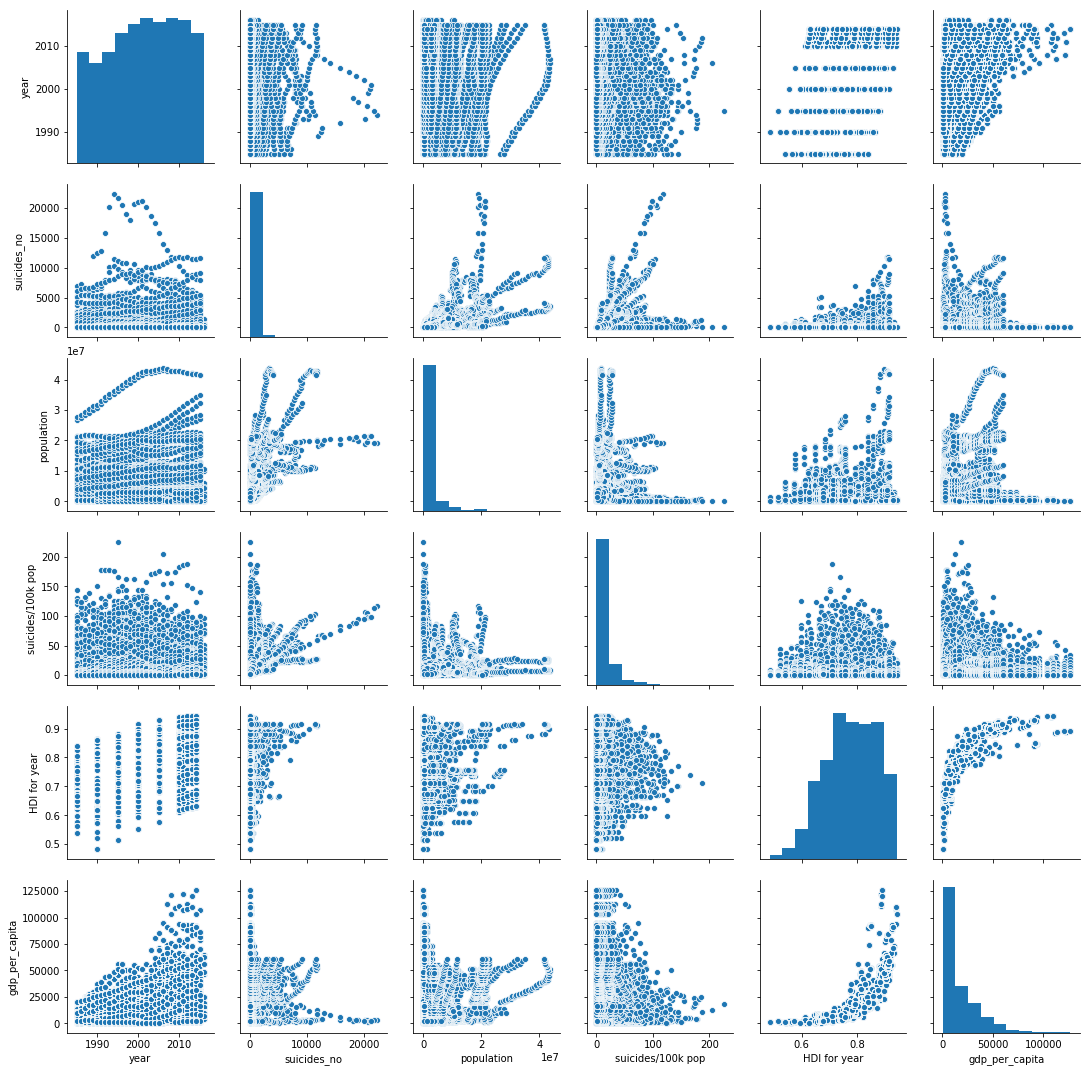

In [13]:
sns.pairplot(df)

## Grouping Total Suicide Per Country

In [14]:
countries = df['country'].unique()
total_suicides = []

for country in countries:
    suicides = df[df['country'] == country]['suicides_no'].sum()
    total_suicides.append(suicides)

In [15]:
country_df = pd.DataFrame([countries, total_suicides]).transpose()
country_df.columns = ['Country', 'Total Suicides']

In [16]:
country_df.head()

,Country,Total Suicides
0,Albania,1970
1,Antigua and Barbuda,11
2,Argentina,82219
3,Armenia,1905
4,Aruba,101


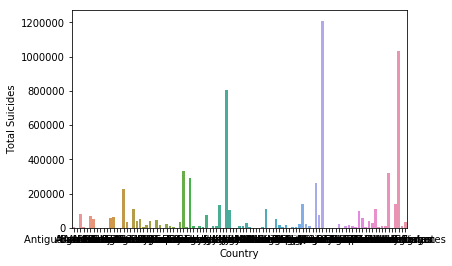

In [17]:
sns.barplot(x = 'Country', y = 'Total Suicides', data = country_df)

## Grouping Total Suicide Per Year Per Sex

In [18]:
years = df['year'].unique()
male_suicides = []
female_suicides = []
total_suicides = []

for year in years:
    suicides = df[df['year'] == year]['suicides_no'].sum()
    total_suicides.append(suicides)
    male = df[(df['year'] == year) & (df['sex'] == 'male')]['suicides_no'].sum()
    male_suicides.append(male)
    female = df[(df['year'] == year) & (df['sex'] == 'female')]['suicides_no'].sum()
    female_suicides.append(female)

In [19]:
year_df = pd.DataFrame([years, male_suicides, female_suicides, total_suicides]).transpose()
year_df.columns = ['Year', 'Male Suicides', 'Female Suicides', 'Total Suicides']

In [20]:
year_df.head()

,Year,Male Suicides,Female Suicides,Total Suicides
0,1987,91836,35006,126842
1,1988,88011,33015,121026
2,1989,118883,41361,160244
3,1992,159906,51567,211473
4,1993,170234,51331,221565


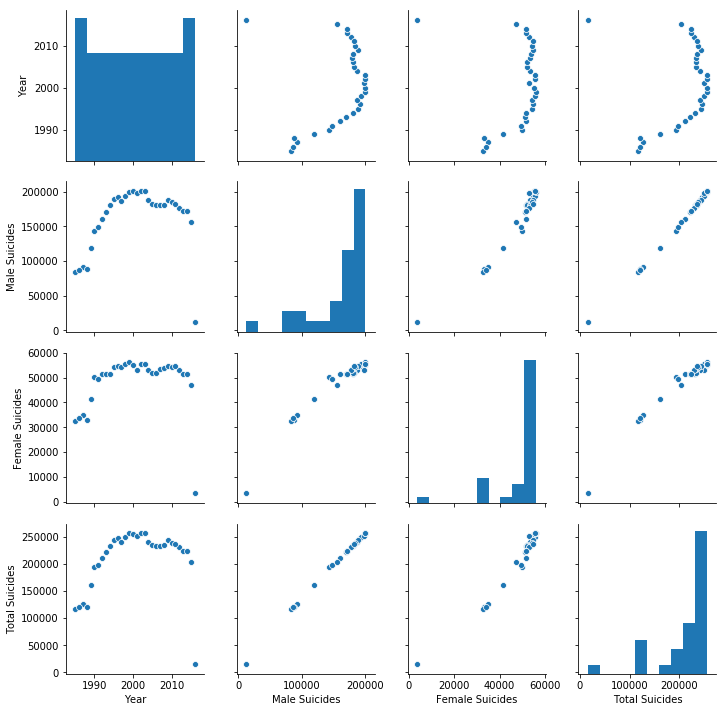

In [14]:
sns.pairplot(year_df)

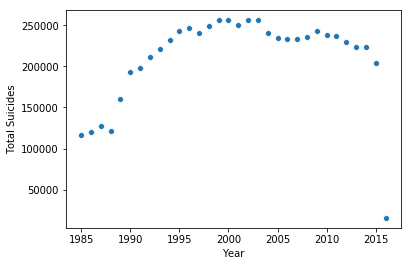

In [15]:
sns.scatterplot(x = "Year", y = "Total Suicides", data=year_df)

## Grouping Total Suicides Per GDP

In [16]:
country_year = df['country-year'].unique()
gdp_year = df['gdp_for_year'].unique()
gdp_capita = df['gdp_per_capita'].unique()
total_suicides = []

for gdp in gdp_year:
    suicides = df[df['gdp_for_year'] == gdp]['suicides_no'].sum()
    total_suicides.append(suicides)

In [17]:
gdp_df = pd.DataFrame([country_year, gdp_year, gdp_capita, total_suicides]).transpose()
gdp_df.columns = ['Country-Year', 'GDP for Year', 'GDP per Capita', 'Total Suicides']

In [18]:
gdp_df.head()

,Country-Year,GDP for Year,GDP per Capita,Total Suicides
0,Albania1987,"2,156,624,900",796,73
1,Albania1988,"2,126,000,000",769,63
2,Albania1989,"2,335,124,988",833,68
3,Albania1992,"709,452,584",251,47
4,Albania1993,"1,228,071,038",437,73


In [ ]:
sns.scatterplot(x = "GDP for Year", y = "Total Suicides", data=gdp_df)

### There seems to be no clear relation between the variables. Let us do some Geographical Plotting instead

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Total Suicides Per Country

In [2]:
import pycountry

In [3]:
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')

In [4]:
def get_country_code(country_name):   
    mapping = {country.name: country.alpha_3 for country in pycountry.countries}
    return mapping.get(country_name)

In [21]:
country_df['CODE'] = country_df['Country'].apply(get_country_code)

In [22]:
country_df.head()

,Country,Total Suicides,CODE
0,Albania,1970,ALB
1,Antigua and Barbuda,11,ATG
2,Argentina,82219,ARG
3,Armenia,1905,ARM
4,Aruba,101,ABW


In [23]:
data = dict(
        type = 'choropleth',
        locations = country_df['CODE'],
        z = country_df['Total Suicides'],
        text = country_df['Country'],
        colorbar = {'title' : 'Total Suicides'},
      ) 

In [24]:
layout = dict(
    title = 'Total Suicides per Country',
    geo = dict(
        showframe = False,
        projection = dict(type = 'equirectangular')
    )
)

In [25]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)